<a href="https://colab.research.google.com/github/karthikpuranik11/Hope-Speech-Detection-/blob/main/English/ULMFiT_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/english_hope_train.tsv', header=None, names=['tweet','label'], sep="\t")
train

,tweet,label
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech
1,@Champions Again He got killed for using false...,Non_hope_speech
2,It's not that all lives don't matter,Non_hope_speech
3,Is it really that difficult to understand? Bla...,Non_hope_speech
4,Whenever we say black isn't that racists? Why...,Non_hope_speech
...,...,...
22757,It's a load of bollocks every life matters sim...,Non_hope_speech
22758,no say it because all lives matter! deku would...,Non_hope_speech
22759,God says her life matters,Non_hope_speech
22760,This video is just shit. A bunch of whiny ass ...,Non_hope_speech


In [3]:
val=pd.read_csv('/content/english_hope_dev.tsv', header=None, names=['tweet','label'], sep="\t")
val

,tweet,label
0,Thats it.... like....I dont like that statue,Non_hope_speech
1,@Generation X Counting money that she been giv...,Non_hope_speech
2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech
3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech
4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech
...,...,...
2838,Such fake sentiment. .,Non_hope_speech
2839,@A G black lives arent undervalued compared to...,Non_hope_speech
2840,People who pulled it down can and will be arre...,Non_hope_speech
2841,@Aaron Castellanos It will be a two hour movie...,Non_hope_speech


In [4]:
df=train.filter(['label','tweet'], axis=1)
df_test=val.filter(['label','tweet'],axis=1)

In [5]:
#removing @ and #
def punc(df):
    df['tweet'] = df['tweet'].str.replace('[#@()]','')
    print(df)

In [6]:
punc(df)
punc(df_test)

                 label                                              tweet
0      Non_hope_speech  these tiktoks radiate gay chaotic energy and i...
1      Non_hope_speech  Champions Again He got killed for using false ...
2      Non_hope_speech               It's not that all lives don't matter
3      Non_hope_speech  Is it really that difficult to understand? Bla...
4      Non_hope_speech  Whenever we say black isn't that racists?  Why...
...                ...                                                ...
22757  Non_hope_speech  It's a load of bollocks every life matters sim...
22758  Non_hope_speech  no say it because all lives matter! deku would...
22759  Non_hope_speech                          God says her life matters
22760  Non_hope_speech  This video is just shit. A bunch of whiny ass ...
22761  Non_hope_speech  Mc Fortnut2821 she did 4 months ago in west ch...

[22762 rows x 2 columns]
                label                                              tweet
0     Non_hop

In [7]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (22762 items)
x: LMTextList
xxbos these tiktoks xxunk gay chaotic energy and i love it,xxbos xxmaj xxunk xxmaj again xxmaj he got killed for using false money,xxbos xxmaj it 's not that all lives do n't matter,xxbos xxmaj is it really that difficult to understand ? xxmaj black lives matter and all lives matter are not xxunk exclusive . xxmaj they are both true as general statements . xxmaj so are white lives matter and asian lives matter . xxmaj black lives matter in this context is simply the name of a movement against the strangely high rate of police violence on black people and the statement is referring to those who behave like and treat black people as if they do nt matter . xxmaj for example,xxbos xxmaj whenever we say black is n't that racists ? xxmaj why do n't just say xxmaj americans .
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (2843 items)
x: LMTextList
xxbos xxmaj that s it xxrep 4 . like xxrep 4 

In [10]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-02
Min loss divided by 10: 3.16E-02


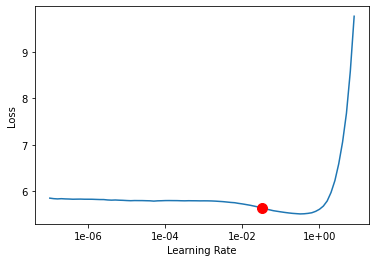

In [11]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [12]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.600221,4.258522,0.246508,00:20
1,4.018975,4.057995,0.263632,00:21


In [13]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.826624,3.989948,0.269149,00:28
1,3.590113,3.863868,0.290354,00:27
2,2.886757,3.931290,0.296508,00:27


In [14]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-04
Min loss divided by 10: 2.09E-04


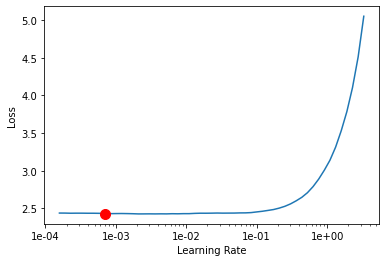

In [15]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [16]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.494096,4.010218,0.293925,00:21
1,2.411242,4.033268,0.295185,00:21
2,2.268005,4.041596,0.294515,00:21


In [17]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-04
Min loss divided by 10: 4.37E-04


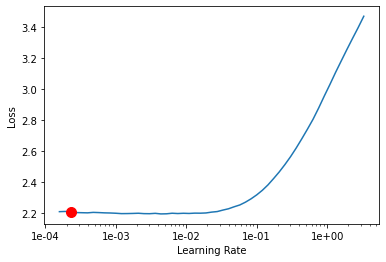

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.258327,4.129331,0.292490,00:22
1,2.205961,4.163588,0.295217,00:22
2,2.038403,4.211503,0.294372,00:22


In [20]:
#save the encoder model
learn.save_encoder('my_encoder')

In [21]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (22762 items)
x: TextList
xxbos these tiktoks xxunk gay chaotic energy and i love it,xxbos xxmaj xxunk xxmaj again xxmaj he got killed for using false money,xxbos xxmaj it 's not that all lives do n't matter,xxbos xxmaj is it really that difficult to understand ? xxmaj black lives matter and all lives matter are not xxunk exclusive . xxmaj they are both true as general statements . xxmaj so are white lives matter and asian lives matter . xxmaj black lives matter in this context is simply the name of a movement against the strangely high rate of police violence on black people and the statement is referring to those who behave like and treat black people as if they do nt matter . xxmaj for example,xxbos xxmaj whenever we say black is n't that racists ? xxmaj why do n't just say xxmaj americans .
y: CategoryList
Non_hope_speech,Non_hope_speech,Non_hope_speech,Non_hope_speech,Non_hope_speech
Path: .;

Valid: LabelList (2843 items)
x: Te

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-01
Min loss divided by 10: 6.31E-02


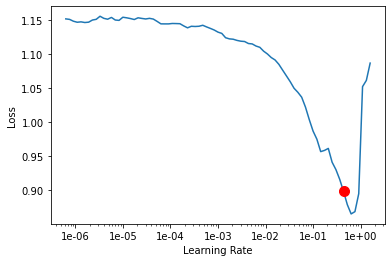

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [24]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.268632,0.233632,0.909954,0.424215,00:15
1,0.227788,0.220295,0.916286,0.000000,00:16
2,0.232929,0.215589,0.919100,0.000000,00:15


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

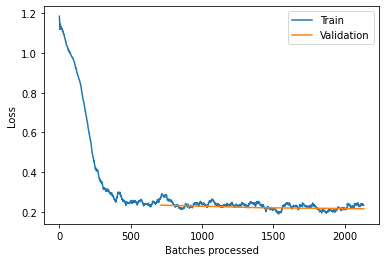

In [25]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.91E-07


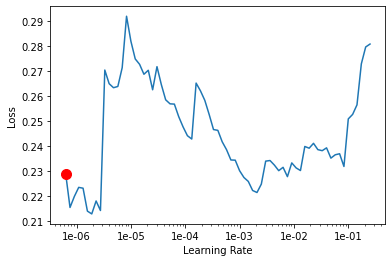

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.189242,0.217082,0.915934,0.445372,00:18
1,0.176345,0.196938,0.921210,0.000000,00:19


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 3.31E-07


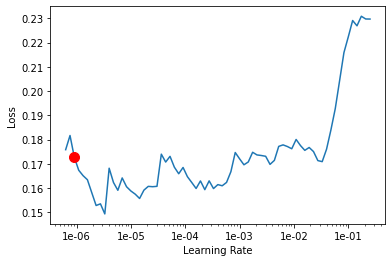

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.181175,0.195377,0.927190,0.507117,00:32
1,0.138302,0.204305,0.926838,0.000000,00:30


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

In [30]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.166817,0.205830,0.926134,0.501889,00:36
1,0.093173,0.255007,0.929300,0.000000,00:39


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.112999,0.248119,0.926486,0.494774,00:39
1,0.070394,0.295346,0.925079,0.000000,00:38


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.049941,0.314275,0.923672,0.500633,00:39
1,0.040226,0.330020,0.927893,0.000000,00:43
2,0.034312,0.334914,0.927541,0.000000,00:41


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

In [31]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [32]:
pd.crosstab(predictions, targets)

col_0,0,1,2
row_0,,,
0,137,69,0
1,135,2500,2


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 137   69    0]
 [ 135 2500    2]
 [   0    0    0]]
0.9275413295814281


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57       206
           1       0.97      0.95      0.96      2637
           2       0.00      0.00      0.00         0

    accuracy                           0.93      2843
   macro avg       0.49      0.54      0.51      2843
weighted avg       0.94      0.93      0.93      2843

